<a href="https://colab.research.google.com/github/mili-b/PredictiveAnalytics/blob/main/Copy_of_Data301_Project1_termdeposits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries

In [ ]:

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


#2. Import Data

In [ ]:
#41188 rows, 21 columns (20 explanatory, dependent y)
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/banking.txt', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))


(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [ ]:
#10 numeric, 10 categorical, dependent y - categorical yes/no
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Input variables 
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

Predict variable (desired target):
y - has the client subscribed a term deposit? (binary: '1','0')



####The dataset reflects the outcome of a direct (phone) marketing campaign of a Portuguese bank seeking to sell bank term deposits. The goal is to predict which customers will subscribe - target (y) will subscribe (1) or not (0) to a term deposit - based on the given customer profile data.

#3. EDA

###Population Distribution - Categorical variables and Age

In [ ]:
#population distribution by target group
#target group overwhelmingly not purchase - 89% - oversampling problem
data['y'].value_counts()


0    36548
1     4640
Name: y, dtype: int64

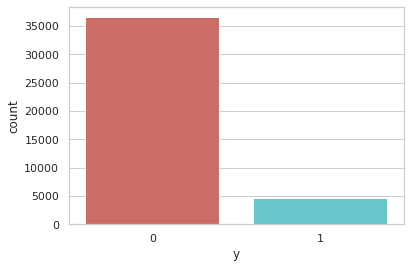

In [ ]:

sns.countplot(x='y',data=data, palette='hls')
plt.show()


In [ ]:

count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)


percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [ ]:
#population distribution across job categories
#almost 75% from 4 jobs - administration, blue-collar, technician, services
data['job'].value_counts()
data['job'].value_counts().div(41188)

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

In [ ]:
#population distribution across marital status
#most - 60% married
data['marital'].value_counts()
data['marital'].value_counts().div(41188)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

In [ ]:
#population distribution across education groups - college eduated targeted most
#over 60% college educated (university, basic.9y, basic 4.y, basic 6.y)
#23% high school, 12.7% professional course, and 0.04% illiterate
data['education'].value_counts()
data['education'].value_counts().div(41188)

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

In [ ]:
#majority 79% - not in default
data['default'].value_counts()
data['default'].value_counts().div(41188)

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

In [ ]:
#similar amounts have/not have housing loan
data['housing'].value_counts()
data['housing'].value_counts().div(41188)

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

In [ ]:
#majority -82% - has no personal loan
data['loan'].value_counts()
data['loan'].value_counts().div(41188)

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

In [ ]:
#most -63% - contacted via cellphone
data['contact'].value_counts()
data['contact'].value_counts().div(41188)

cellular     0.634748
telephone    0.365252
Name: contact, dtype: float64

In [ ]:
#most contacts in May (33%). more than 77% of contacts made May-August
#No contacts in January and February
data['month'].value_counts()
data['month'].value_counts().div(41188)

may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: month, dtype: float64

In [ ]:
#similar amounts contacted throughout the work week
data['day_of_week'].value_counts()
data['day_of_week'].value_counts().div(41188)

thu    0.209357
mon    0.206711
wed    0.197485
tue    0.196416
fri    0.190031
Name: day_of_week, dtype: float64

In [ ]:
#most (86%) not targeted/nonexistent in previous marketing campaign
data['poutcome'].value_counts()
data['poutcome'].value_counts().div(41188)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

In [ ]:
#average age targeted was 40 years and those most frequently targets
#were in the 30-50 age group

data['age'].mean()

40.02406040594348

In [ ]:
data['age'].median()

38.0

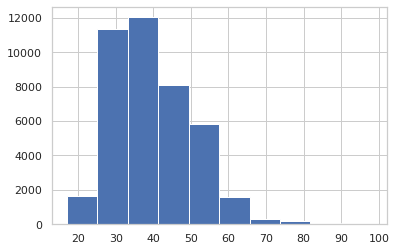

In [ ]:
data['age'].hist()

####Profile targeted group - most in the 30-50 age group with an average age of about 40 years, married (60%), college educated (60%) and from 4 main jobs 75% (admin, blue collar, tech, services).  The majority were not in default (79%) and had no personal loan (82%).  They were mostly contacted via cell phone (63%) during May-August (77%).  Most(82%) were not targeted in any previous sales campaign by the bank. The group was fairly evenly divided between those who have and did not have a house loan, and the day of the week they were targeted. The group overwhelmingly did not subscribe to the bank's term deposits (88.7%)

In [ ]:
#sns.heatmap()

In [ ]:
#means for numeric variables across target groups
#duration, pdays, previous, euribor3m appear to differ across who purchase/not
data.groupby('y').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
#means for numeric variables across jobs
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [ ]:

data.groupby('marital').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [ ]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [ ]:
data.groupby('month').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
month,,,,,,,,,,,
apr,40.593845,293.200608,1.947188,955.587386,0.323328,-1.800000,93.119558,-46.273632,1.361070,5093.123708,0.204787
aug,41.644221,232.430722,2.666559,961.062156,0.115410,0.747151,93.311065,-35.597184,4.300623,5200.248349,0.106021
dec,47.307692,345.609890,2.159341,748.060440,0.615385,-2.846154,92.715363,-33.708791,0.865319,5031.895604,0.489011
jul,39.035545,273.426122,3.160998,982.700725,0.047115,1.158921,93.894923,-42.370170,4.685678,5214.078575,0.090466
jun,39.766077,242.561301,3.072208,970.221512,0.083114,0.688379,94.245402,-41.579428,4.256908,5197.493193,0.105115
mar,40.778388,245.946886,2.203297,835.454212,0.483516,-1.800000,93.097330,-42.650549,1.162745,5055.390110,0.505495
may,39.031084,261.231752,2.439756,981.120415,0.164209,-0.164972,93.528882,-40.579272,3.293665,5149.521592,0.064347
nov,40.965618,245.855645,1.909290,952.950256,0.293587,-0.418483,93.200943,-41.238747,3.723123,5173.031236,0.101439
oct,44.171309,288.367688,1.545961,781.909471,0.647632,-2.438579,93.175107,-34.580919,1.200123,5018.823816,0.438719


In [ ]:
data.groupby('day_of_week').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
day_of_week,,,,,,,,,,,
fri,40.177846,252.748818,2.719944,967.793791,0.177463,0.032337,93.578735,-40.532260,3.566249,5165.109799,0.108087
mon,40.412497,246.568358,2.645760,962.852948,0.171012,0.026063,93.577108,-40.877790,3.542196,5164.568393,0.099483
thu,39.591557,265.674591,2.595268,959.501913,0.174417,0.058460,93.556380,-40.753323,3.574923,5166.662693,0.121188
tue,40.427441,260.455995,2.426823,959.715575,0.173053,0.128220,93.577088,-40.034227,3.701038,5168.486094,0.117800
wed,39.526801,265.883206,2.449840,962.859970,0.169044,0.166745,93.590225,-40.281387,3.726885,5170.425436,0.116671


In [ ]:
data.groupby('poutcome').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
poutcome,,,,,,,,,,,
failure,39.946143,248.112888,2.005174,965.976011,1.168627,-1.685442,93.067755,-42.720461,1.651071,5092.589534,0.142286
nonexistent,39.956190,257.082192,2.664145,999.000000,0.000000,0.377091,93.645708,-40.319045,3.958189,5181.203492,0.088322
success,42.023307,320.941733,1.808449,5.587764,1.569556,-2.091260,93.334355,-38.388565,0.996563,5030.622433,0.651129


In [ ]:

#means for numeric variables across default
data.groupby('default').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
default,,,,,,,,,,,
no,39.140635,259.842549,2.520744,954.787130,0.199030,-0.082168,93.525639,-40.565469,3.447246,5159.990214,0.12879
unknown,43.371990,252.435035,2.745609,991.606258,0.074096,0.703466,93.765365,-40.265139,4.280654,5193.725951,0.05153
yes,42.333333,103.333333,1.333333,999.000000,0.333333,0.900000,93.362667,-38.066667,4.693000,5217.333333,0.00000


In [ ]:
#means for numeric variables across housing loan
data.groupby('housing').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
housing,,,,,,,,,,,
no,40.044195,260.663677,2.601010,964.559875,0.161153,0.184089,93.624836,-40.337590,3.732474,5170.661857,0.108796
unknown,39.951515,250.194949,2.560606,964.896970,0.184848,0.113434,93.636011,-40.289192,3.653046,5166.457273,0.108081
yes,40.010011,256.603217,2.539071,960.565304,0.182610,-0.007773,93.530456,-40.654811,3.523873,5163.932949,0.116194


In [ ]:
#means for numeric variables across personal loan
data.groupby('loan').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
loan,,,,,,,,,,,
no,40.058822,258.507246,2.561414,962.411841,0.173078,0.080150,93.575402,-40.481284,3.620732,5166.920563,0.113402
unknown,39.951515,250.194949,2.560606,964.896970,0.184848,0.113434,93.636011,-40.289192,3.653046,5166.457273,0.108081
yes,39.846671,258.359315,2.602273,962.437420,0.170455,0.086316,93.567529,-40.652241,3.619294,5167.754369,0.109315


In [ ]:
#means for numeric variables across type of phone contact
#duration, pdays, target means seem to differ
data.groupby('contact').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
contact,,,,,,,,,,,
cellular,39.968559,263.527846,2.405026,945.749235,0.252869,-0.387137,93.315957,-41.385959,3.095316,5152.284260,0.147376
telephone,40.120513,249.173823,2.850106,991.542874,0.034100,0.896969,94.026993,-38.967469,4.535349,5192.671856,0.052313


## Profile by subscribe/not subscribe

Text(0, 0.5, 'Proportion of Customers')

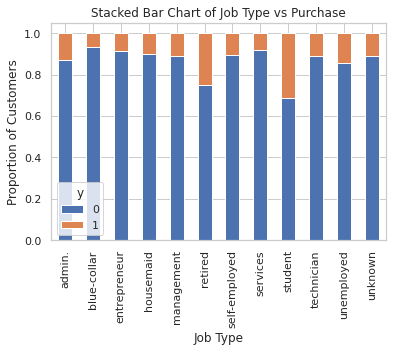

In [ ]:
#job type seem to matter for purchase
#jobs targeted the most (admin, blue collar, tech, services etc), had lower
#subscription rates. Retired and students have higher subscription rates
# but were among the least targeted groups)

table=pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job Type vs Purchase')
plt.xlabel('Job Type')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

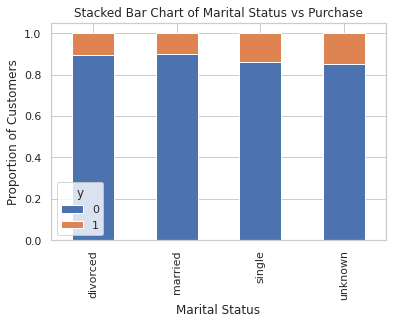

In [ ]:
#marital status not seem to matter to purchase

table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

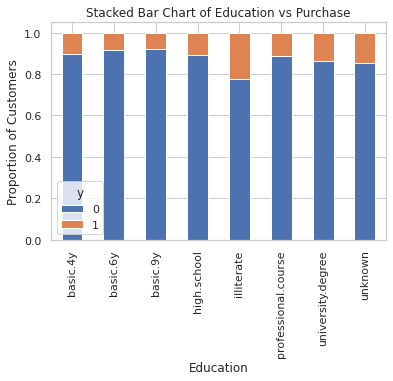

In [ ]:
#education seem to matter to purchase
#College educated (basic 4, 6, 9 and university) were most targeted but 
#had lower subscription rates. Illiterate had the highest subscription rate
#but was only 0.04% of the targeted group

table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

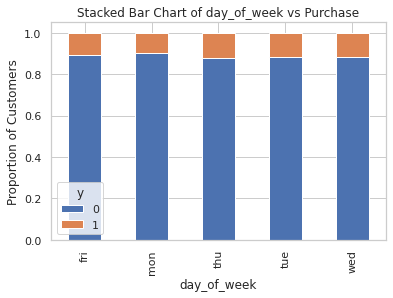

In [ ]:
#day of week not seem to matter to purchase

table=pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of day_of_week vs Purchase')
plt.xlabel('day_of_week')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

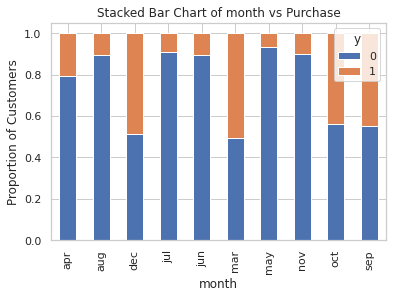

In [ ]:
#month seem to matter to purchase
#slower months (dec, mar, oct, sept) had higher subscriotion rates
#while heavily targeted months (may-aug) had lower subscription rates

table=pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of month vs Purchase')
plt.xlabel('month')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

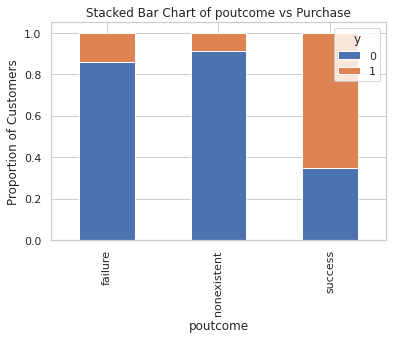

In [ ]:
#poutcome seem to matter to purchase
#earlier marketing success seem to yield higher proportion of purchase 
#this time also

table=pd.crosstab(data.poutcome,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of poutcome vs Purchase')
plt.xlabel('poutcome')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

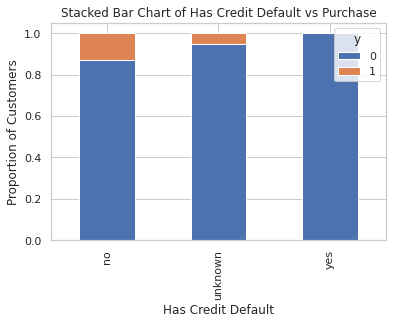

In [ ]:
#default may matter to purchase
#higher proportion not in default pruchase - compared to unkown

table=pd.crosstab(data.default,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Has Credit Default vs Purchase')
plt.xlabel('Has Credit Default')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

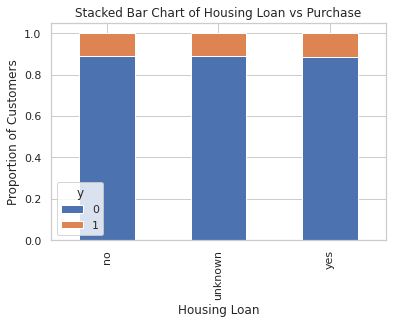

In [ ]:
# housing loan not seem to matter to purchase

table=pd.crosstab(data.housing,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Housing Loan vs Purchase')
plt.xlabel('Housing Loan')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

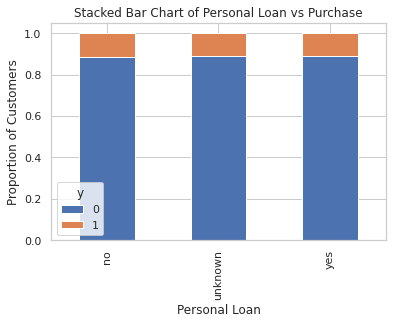

In [ ]:
#personal loan not seem to matter to purchase

table=pd.crosstab(data.loan,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Personal Loan vs Purchase')
plt.xlabel('Personal Loan')
plt.ylabel('Proportion of Customers')


Text(0, 0.5, 'Proportion of Customers')

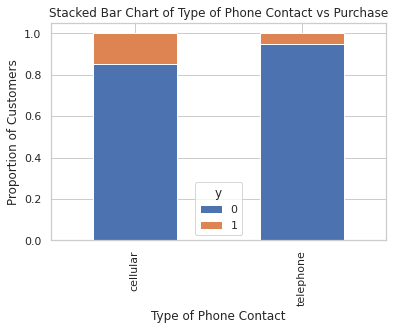

In [ ]:
#form of phone contact seem to matter to purchase
#cell phone contact seem to yield higher proportion of purchase and most (60%)
#were contacted by cellphone

table=pd.crosstab(data.contact,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Type of Phone Contact vs Purchase')
plt.xlabel('Type of Phone Contact')
plt.ylabel('Proportion of Customers')


Text(0, 0.5, 'Proportion of Customers')

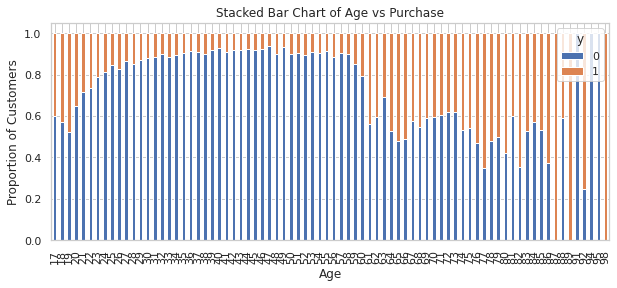

In [ ]:
#though most targeted were in the 30-50 age group, a higher fraction of those
#50 years and above purchased term deposits

table=pd.crosstab(data.age,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10, 4), 
                                                   stacked=True)
plt.title('Stacked Bar Chart of Age vs Purchase')
plt.xlabel('Age')
plt.ylabel('Proportion of Customers')


####Who had higher subscription rates? - those 60 years and older (though among the least targeted), those contacted by cellphone (also among the most targeted), those who were targeted in previous campaigns and purchased in earlier campaigns, those those not in default, those who purchased in the slower months (compared to the heavily marketed months of may-aug), the illiterate (compared to more heavily targeted education groups), and student and retirees (compared to more heavily targeted jobs).  Personal loan, house loan, marital status and day of the week targeted did not seem to matter.

###Reducing Education categories for better modelling

In [ ]:
#condense all college educated groups into one group - college
#from 8 to 5 education groups

data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [ ]:
data['education']=np.where(data['education'] =='basic.9y', 'College', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'College', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'College', data['education'])
data['education']=np.where(data['education'] =='university.degree', 'College', data['education'])

In [ ]:
data['education'].unique()

array(['College', 'unknown', 'high.school', 'professional.course',
       'illiterate'], dtype=object)

Text(0, 0.5, 'Proportion of Customers')

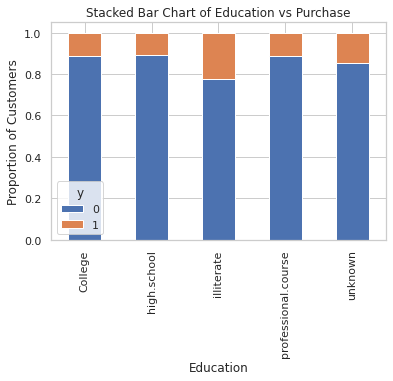

In [ ]:
#education still matter after reduction in groups - illiterate still stands out
#college educated accounts for 60% of the targeted group

table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')


In [ ]:
data['education'].value_counts()
data['education'].value_counts().div(41188)

College                0.599228
high.school            0.231014
professional.course    0.127294
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,College,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,College,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,College,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

###Create dummies for categorical variables

In [ ]:
#create dummies for categorical variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

 #tell what to keep from dummies   and display final columns 
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_College', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'd

### Address Oversampling problem with target group - improve sampling for non-subscribed group
###Over-sampling using SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

In [ ]:

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))


length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


#4. Implementing the model

####Defining the model

In [ ]:

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]


In [ ]:

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# rfe = RFE(20)
# rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
logreg.fit(os_data_X, os_data_y.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#define columns to use - based on EDA analysis and subjective choices 
#and keep adjusting until matrix is non-singular and can yield a result 
#in the logit model below

cols=['age', 'euribor3m', 'job_admin.', 'job_blue-collar', 
       'job_management', 'job_retired', 
       'job_self-employed', 'job_services', 'job_student', 
       'job_technician', 'education_College', 'education_illiterate', 
       'education_unknown', 'default_no', 'default_unknown', 
       'contact_cellular', 'month_apr', 'month_aug', 'month_dec', 
       'month_jul', 'month_jun', 'month_mar', 'month_may', 
       'month_nov', 'month_oct', 'poutcome_failure', 'poutcome_success'] 
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.350485
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.494     
Dependent Variable:   y                 AIC:               35897.4458
Date:                 2022-04-18 01:13  BIC:               36136.1853
No. Observations:     51134             Log-Likelihood:    -17922.   
Df Model:             26                LL-Null:           -35443.   
Df Residuals:         51107             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
age                   0.0662   0.0012  52.9506 0.0000  0.0637  0.0686
euribor3m       

In [ ]:
#improve the model fit by dropping insignificant variables based on z, pvalues
#and subjective analysis
#drop contact cellular, default_no

cols=['age', 'euribor3m', 'job_admin.', 'job_blue-collar', 
       'job_management', 'job_retired', 
       'job_self-employed', 'job_services', 'job_student', 
       'job_technician', 'education_College', 'education_illiterate', 
       'education_unknown', 'default_unknown', 
       'month_apr', 'month_aug', 'month_dec', 
       'month_jul', 'month_jun', 'month_mar', 'month_may', 
       'month_nov', 'month_oct', 'poutcome_failure', 'poutcome_success'] 
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.367656
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.470     
Dependent Variable:   y                 AIC:               37649.4104
Date:                 2022-04-18 01:13  BIC:               37870.4655
No. Observations:     51134             Log-Likelihood:    -18800.   
Df Model:             24                LL-Null:           -35443.   
Df Residuals:         51109             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
age                   0.0907   0.0010  86.5723 0.0000  0.0887  0.0928
euribor3m       

####Train the model

In [ ]:
#import logisitc regression and set up training split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#define prediction model
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.88


#5. Model Evaluation

In [ ]:
#import confusion matrix - to calculate true positves (6855), 
#true negatives (6431), false positives (811), false negatives (1244)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6888  778]
 [1099 6576]]


In [ ]:
#model is 87% accurate - 87% of the time it correctly predicts - both 
#true positives and true negatives
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7666
           1       0.89      0.86      0.88      7675

    accuracy                           0.88     15341
   macro avg       0.88      0.88      0.88     15341
weighted avg       0.88      0.88      0.88     15341



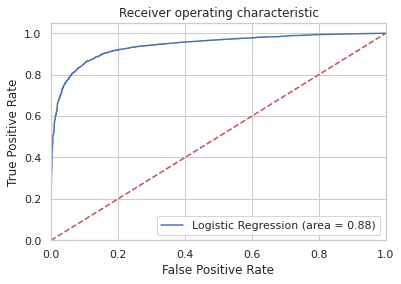

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


###87% of the time, the model correctly predicts who will subscribe or not subscribe to a term deposit